In [59]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [60]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [61]:
X_train.shape

(60000, 28, 28)

In [62]:
X_test.shape

(10000, 28, 28)

In [63]:
single_image= X_train[0]

In [64]:
single_image.shape

(28, 28)

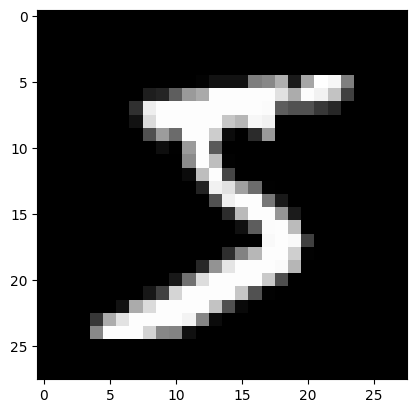

In [65]:
plt.imshow(single_image,cmap='gray')

In [66]:
y_train.shape

(60000,)

In [67]:
X_train.min()

0

In [68]:
X_train.max()

255

In [69]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [70]:
X_train_scaled.min()

0.0

In [71]:
X_train_scaled.max()

1.0

In [72]:
y_train[0]

5

In [73]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [74]:
type(y_train_onehot)

numpy.ndarray

In [75]:
y_train_onehot.shape

(60000, 10)

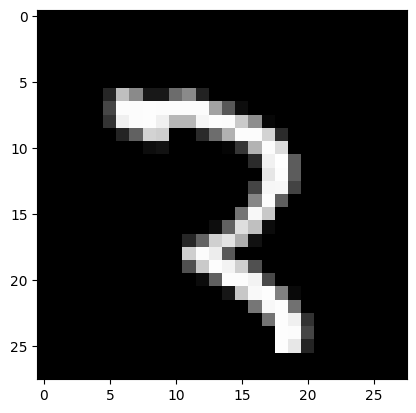

In [76]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [77]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [78]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [79]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [82]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 64ms/step - accuracy: 0.8802 - loss: 0.4140 - val_accuracy: 0.9787 - val_loss: 0.0641
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.9845 - loss: 0.0513 - val_accuracy: 0.9885 - val_loss: 0.0367
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 61ms/step - accuracy: 0.9880 - loss: 0.0380 - val_accuracy: 0.9900 - val_loss: 0.0301
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 65ms/step - accuracy: 0.9911 - loss: 0.0268 - val_accuracy: 0.9912 - val_loss: 0.0276
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.9930 - loss: 0.0223 - val_accuracy: 0.9912 - val_loss: 0.0302


In [83]:
metrics = pd.DataFrame(model.history.history)

In [84]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.946800,0.177678,0.9787,0.064128
1,0.984717,0.050099,0.9885,0.036702
2,0.988167,0.038110,0.9900,0.030096
3,0.990683,0.028670,0.9912,0.027633
4,0.992450,0.023287,0.9912,0.030173


<Axes: >

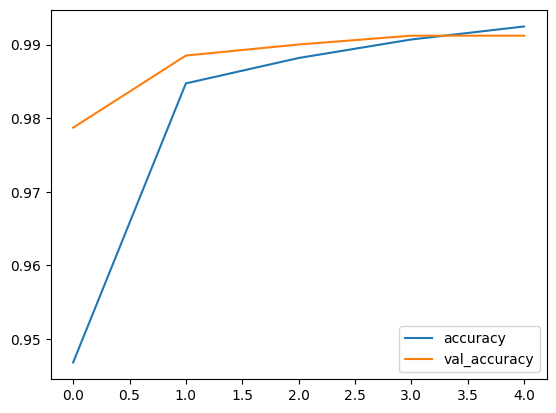

In [85]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

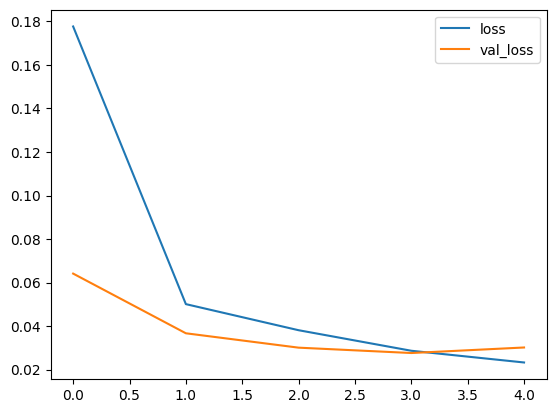

In [86]:
metrics[['loss','val_loss']].plot()

In [87]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [88]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 977    0    2    0    0    0    0    1    0    0]
 [   0 1120    2    4    1    0    5    1    1    1]
 [   1    0 1030    0    0    0    0    1    0    0]
 [   0    0    2 1006    0    0    0    1    1    0]
 [   0    0    1    0  975    0    0    0    0    6]
 [   0    0    0   13    0  876    1    0    1    1]
 [   4    1    0    0    4    2  946    0    1    0]
 [   0    1    7    1    0    0    0 1013    1    5]
 [   1    0    2    1    1    0    0    1  967    1]
 [   1    0    0    2    1    2    0    0    1 1002]]


In [89]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [90]:
img = image.load_img('image.png')

In [91]:
type(img)

PIL.Image.Image

In [92]:
img = image.load_img('image.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

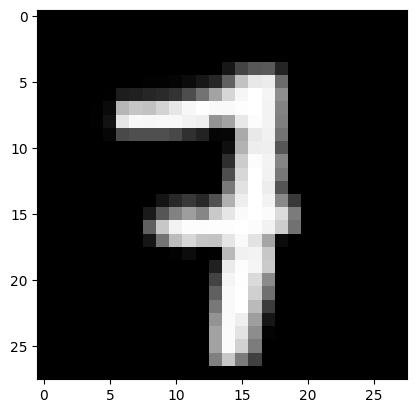

In [93]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [94]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [95]:
print(x_single_prediction)

[7]
